In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets

In [4]:
iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [5]:
from sklearn.svm import SVC

In [6]:
model = SVC()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [9]:
model.fit(X_train, Y_train)

SVC()

In [10]:
from sklearn import metrics

In [11]:
predicted = model.predict(X_test)

expected = Y_test

In [12]:
print(metrics.accuracy_score(expected, predicted))

0.9736842105263158


In [13]:
from sklearn import svm

In [15]:
X = iris.data[:,:2]

Y = iris.target

In [16]:
C = 1.0

In [17]:
svc = svm.SVC(kernel = 'linear', C=C).fit(X,Y)

In [18]:
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 0.7, C=C).fit(X,Y)

In [19]:
poly_svc = svm.SVC(kernel = 'poly', degree= 3, C=C).fit(X,Y)

In [21]:
lin_svc = svm.LinearSVC(C=C, dual= False).fit(X,Y)

In [23]:
# Set up mesh grid

h = 0.02

x_min = X[:,0].min() - 1
x_max = X[:,0].max() + 1

y_min = X[:,1].min() - 1
y_max = X[:,1].max() + 1

In [24]:
xx, yy = np.meshgrid(np.arange(x_min,x_max, h),np.arange(y_min,y_max, h))

In [25]:
# Plot titles

titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

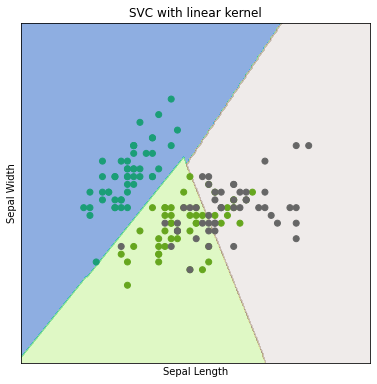

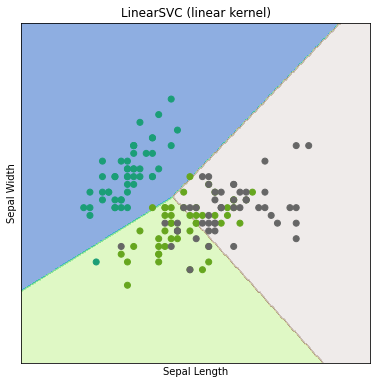

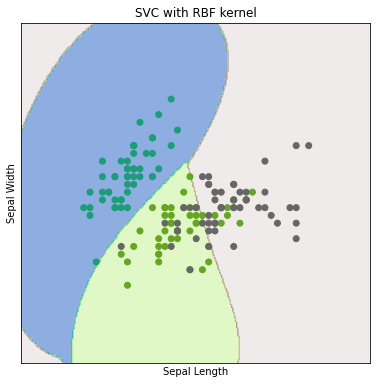

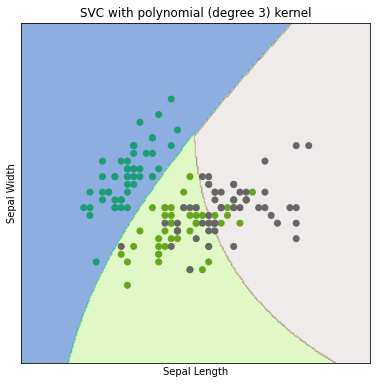

In [27]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    plt.figure(figsize = (15, 15))
    
    plt.subplot(2,2, i+1)
    # White space in between subplots
    plt.subplots_adjust(wspace=0.4, hspace= 0.4)
    
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx,yy,Z,cmap = plt.cm.terrain, alpha = 0.5)
    
    plt.scatter(X[:,0], X[:,1], c=Y, cmap= plt.cm.Dark2)
    
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(),yy.max())
    
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])